In [2]:
import numpy as np
import cv2
import PIL
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [3]:
imagen = Image.open('img/jupiter_2.jpg')
imagen_array = np.array(imagen)

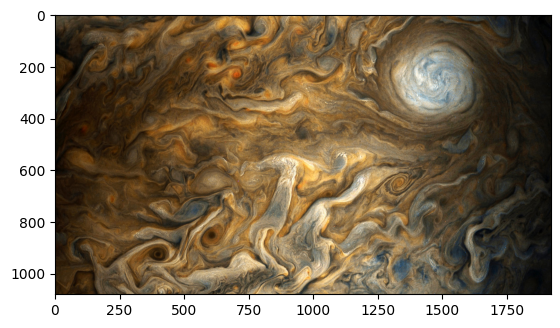

In [4]:
plt.imshow(imagen)
plt.show()

imagen.save('salidas/jupiter_copia.png')

In [5]:
print("primer pixel de la imagen ", imagen_array[0,0])


primer pixel de la imagen  [95 84 66]


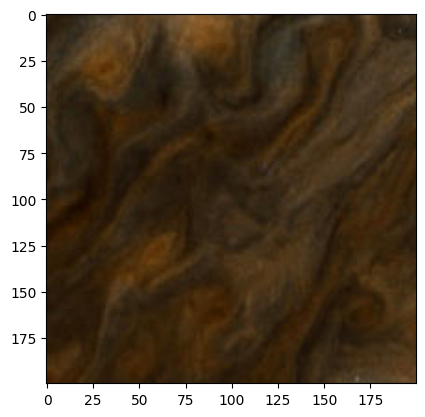

In [6]:
imagen_recortada_array = imagen_array[200:400, 200:400]
imagen_recortada = Image.fromarray(imagen_recortada_array.astype('uint8'))

plt.imshow(imagen_recortada)
plt.show()

# imagen_recortada.save('salidas/jupiter_recortada.png')

In [7]:
mask = np.zeros(imagen_array.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img=cv2.bitwise_and(imagen_array,imagen_array,mask= mask)

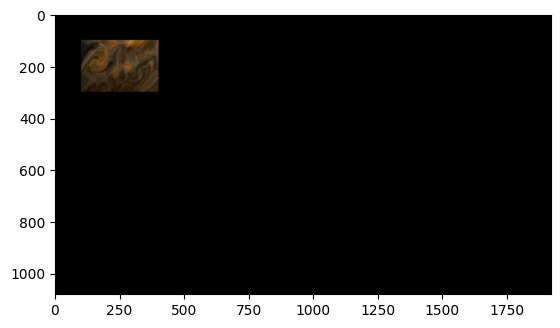

In [8]:
plt.imshow(masked_img.astype('uint8'))
plt.show()

In [9]:
## color medio de la imagen dentro de la mascara
mean_color = np.mean(imagen_array[mask == 255], axis=0) 
#cantidad de pixeles dentro de la mascara
print("cantidad de pixeles dentro de la mascara", np.sum(mask == 255))
print("color medio", mean_color)

cantidad de pixeles dentro de la mascara 60000
color medio [69.56543333 50.26148333 26.30313333]


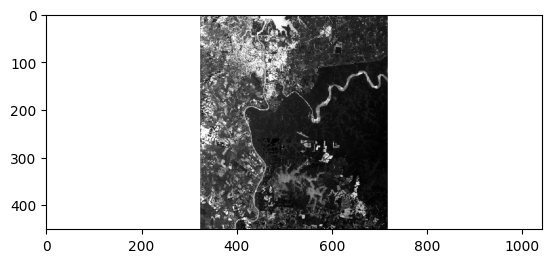

In [10]:
imagen_lc = Image.open('img/LC08_224-078_2018-01-05_blue.tif')

plt.imshow(imagen_lc)
plt.show()

In [11]:
imagen_lc_array = np.array(imagen_lc)

mask = np.zeros(imagen_lc_array.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img=cv2.bitwise_and(imagen_lc_array,imagen_lc_array,mask= mask)


In [12]:
imagen_lc_array.shape

(451, 1042, 4)

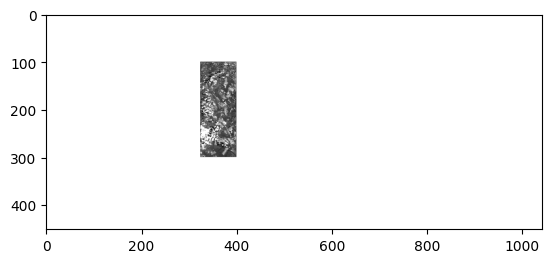

In [13]:
plt.imshow(masked_img.astype('uint8'))
plt.show()

In [14]:
#color medio de la imagen dentro de la mascara
mean_color = np.mean(imagen_lc_array[mask == 255], axis=0)
#cantidad de pixeles dentro de la mascara
print("cantidad de pixeles dentro de la mascara", np.sum(mask == 255))
print("color medio", mean_color)


cantidad de pixeles dentro de la mascara 60000
color medio [28.23188333 28.23188333 28.23188333 64.566     ]


PUNTO 4
FUNCION GAMMA

In [15]:
def ajuste_gamma(imagen,gamma):
    imagenresultado=255*((imagen/255)**gamma)
    imagenresultado=imagenresultado.astype('uint8')
    return imagenresultado

img = cv2.imread('img/jupiter_2.jpg', 0)

img_gamma_05 = ajuste_gamma(img, 0.5)
img_gamma_15 = ajuste_gamma(img, 1.5)


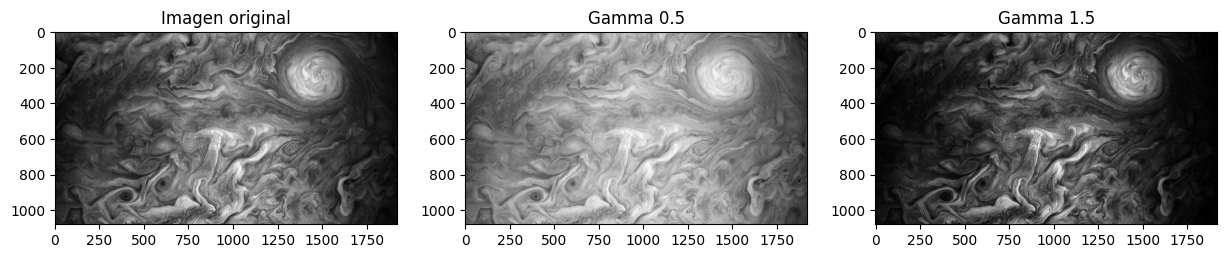

In [16]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(img, cmap='gray')
ax1.set_title('Imagen original')
ax2.imshow(img_gamma_05, cmap='gray')
ax2.set_title('Gamma 0.5')
ax3.imshow(img_gamma_15, cmap='gray')
ax3.set_title('Gamma 1.5')
plt.show()


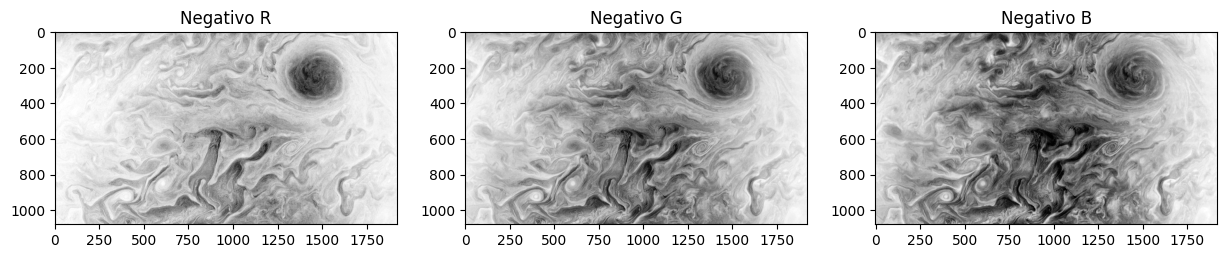

In [17]:
# negativo de la imagen
img = cv2.imread('img/jupiter_2.jpg')
img_negativo_r = 255 - np.array(img)[:,:,0]
img_negativo_g = 255 - np.array(img)[:,:,1]
img_negativo_b = 255 - np.array(img)[:,:,2]

#plot 3 negativos
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(img_negativo_r, cmap='gray')
ax1.set_title('Negativo R')
ax2.imshow(img_negativo_g, cmap='gray')
ax2.set_title('Negativo G')
ax3.imshow(img_negativo_b, cmap='gray')
ax3.set_title('Negativo B')
plt.show()



PUNTO 7 HISTOGRAMA

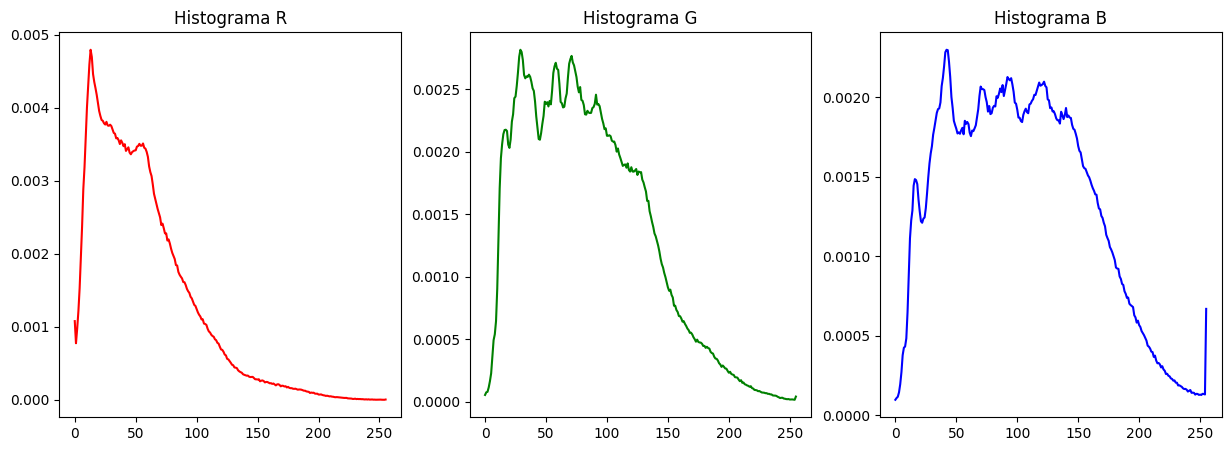

In [18]:
# histograma de cada banda
img = cv2.imread('img/jupiter_2.jpg')

hist_r = cv2.calcHist([img],[0],None,[256],[0,256])
hist_r = hist_r/img.size
hist_g = cv2.calcHist([img],[1],None,[256],[0,256])
hist_g = hist_g/img.size
hist_b = cv2.calcHist([img],[2],None,[256],[0,256])
hist_b = hist_b/img.size

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.plot(hist_r, color='red')
ax1.set_title('Histograma R')
ax2.plot(hist_g, color='green')
ax2.set_title('Histograma G')
ax3.plot(hist_b, color='blue')
ax3.set_title('Histograma B')
plt.show()


PUNTO 8

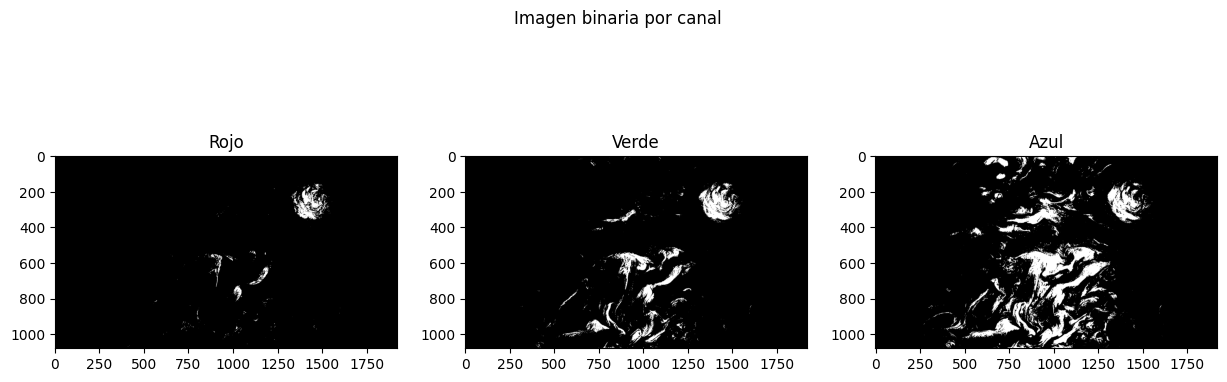

In [19]:
# aplicar umbral de 100 resultando imagen binaria y plot
img = cv2.imread('img/jupiter_2.jpg')

img_r = img[:,:,0]
img_g = img[:,:,1]
img_b = img[:,:,2]

thresh = 180
img_bin_r = cv2.threshold(img_r, thresh, 255, cv2.THRESH_BINARY)[1]
img_bin_g = cv2.threshold(img_g, thresh, 255, cv2.THRESH_BINARY)[1]
img_bin_b = cv2.threshold(img_b, thresh, 255, cv2.THRESH_BINARY)[1]

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(img_bin_r, cmap='gray')
ax1.set_title('Rojo')
ax2.imshow(img_bin_g, cmap='gray')
ax2.set_title('Verde')
ax3.imshow(img_bin_b, cmap='gray')
ax3.set_title('Azul')

plt.suptitle('Imagen binaria por canal')
plt.show()


PUNTO 9

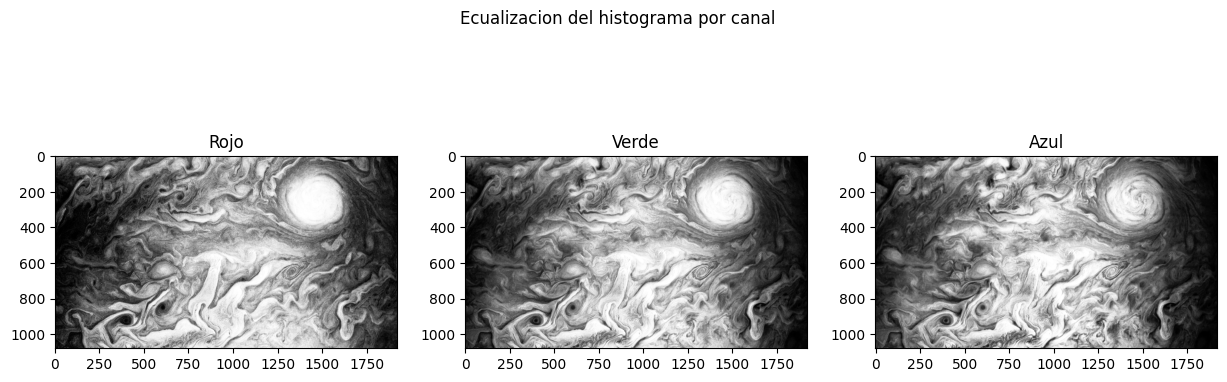

In [20]:
# ecualizacion del histograma de cada banda
img = cv2.imread('img/jupiter_2.jpg')

img_r = img[:,:,0]
img_g = img[:,:,1]
img_b = img[:,:,2]

img_eq_r = cv2.equalizeHist(img_r)
img_eq_g = cv2.equalizeHist(img_g)
img_eq_b = cv2.equalizeHist(img_b)

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(img_eq_r, cmap='gray')
ax1.set_title('Rojo')
ax2.imshow(img_eq_g, cmap='gray')
ax2.set_title('Verde')
ax3.imshow(img_eq_b, cmap='gray')
ax3.set_title('Azul')

plt.suptitle('Ecualizacion del histograma por canal')
plt.show()


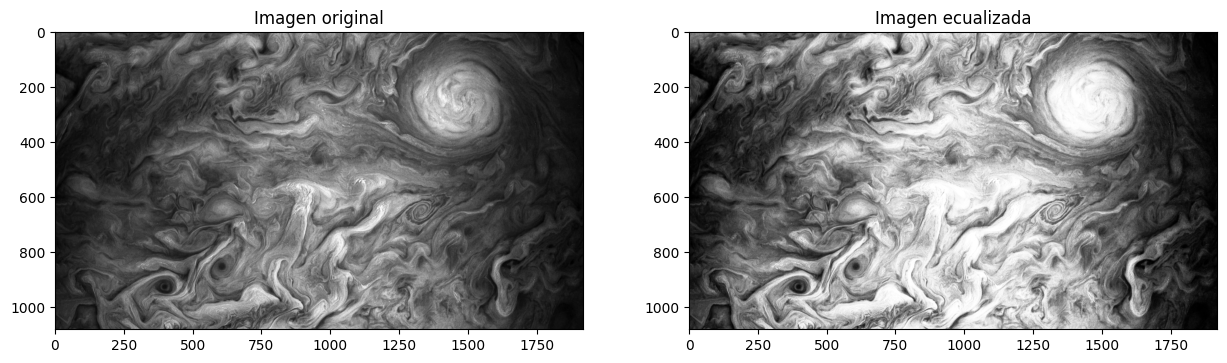

In [21]:
# ecualizacion del histograma de la imagen en escala de grises

img = cv2.imread('img/jupiter_2.jpg', 0)
img_eq = cv2.equalizeHist(img)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.imshow(img, cmap='gray')
ax1.set_title('Imagen original')
ax2.imshow(img_eq, cmap='gray')
ax2.set_title('Imagen ecualizada')
plt.show()


PUNTO 10

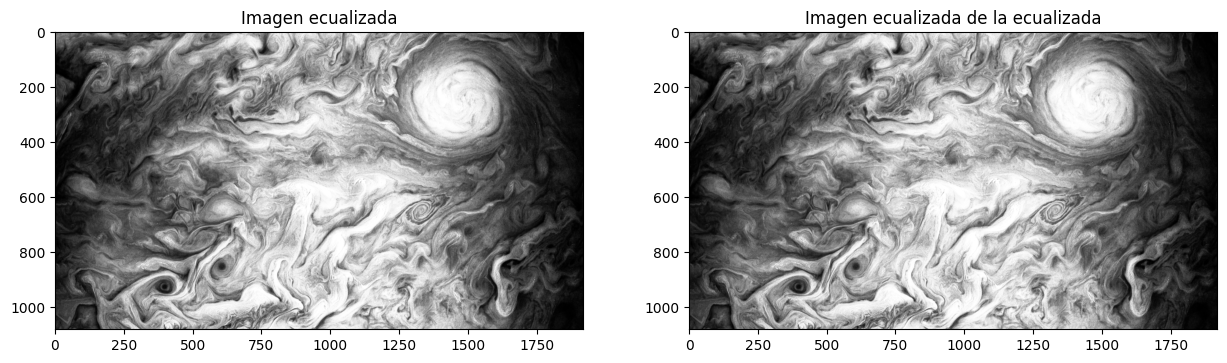

In [22]:
# equalizar histograma de la imagen ya equaizada
img = cv2.imread('img/jupiter_2.jpg', 0)
img_eq = cv2.equalizeHist(img)
img_eq_eq = cv2.equalizeHist(img_eq)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.imshow(img_eq, cmap='gray')
ax1.set_title('Imagen ecualizada')
ax2.imshow(img_eq_eq, cmap='gray')
ax2.set_title('Imagen ecualizada de la ecualizada')
plt.show()

PUNTO 11


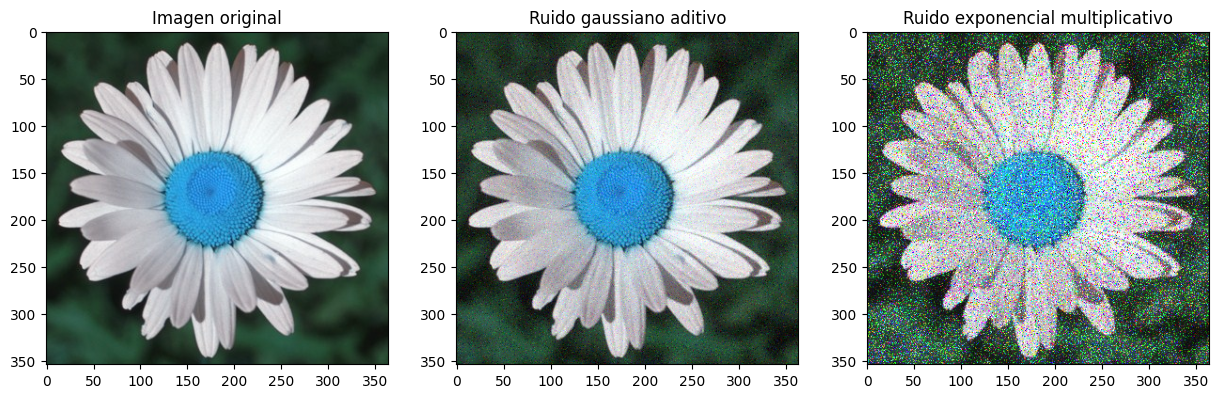

In [23]:
## aplicar ruido gausiano aditivo en un porcentaje de la imagen
def ruido_gaussiano_aditivo(imagen, media, desviacion, contaminacion):
    ruido = np.random.normal(media, desviacion, imagen.shape)
    
    porcentaje = (100-contaminacion) / 100
    mask = np.random.rand(imagen.shape[0], imagen.shape[1]) < porcentaje
    ruido[mask] = 0
    
    imagen_ruido = imagen + ruido
    imagen_ruido = np.clip(imagen_ruido, 0, 255)
    imagen_ruido = imagen_ruido.astype('uint8')
    
    return imagen_ruido


## ruido exponencial multiplicativo 
def ruido_exponencial_multiplicativo(imagen, coef_lambda, contaminacion):
    beta = 1/coef_lambda
    ruido = np.random.exponential(beta, imagen.shape)
    porcentaje = (100-contaminacion) / 100
    mask = np.random.rand(imagen.shape[0], imagen.shape[1]) < porcentaje
    ruido[mask] = 1

    imagen_ruido = imagen * ruido
    imagen_ruido = np.clip(imagen_ruido, 0, 255)
    imagen_ruido = imagen_ruido.astype('uint8')
    return imagen_ruido



img = cv2.imread('daisy.jpg')
img_ruido_gaus = ruido_gaussiano_aditivo(img, 0, 20,50)
img_ruido_gaus_1 = ruido_exponencial_multiplicativo(img, 0.5, 50)

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(img)
ax1.set_title('Imagen original')
ax2.imshow(img_ruido_gaus)
ax2.set_title('Ruido gaussiano aditivo')
ax3.imshow(img_ruido_gaus_1)
ax3.set_title('Ruido exponencial multiplicativo')
plt.show()







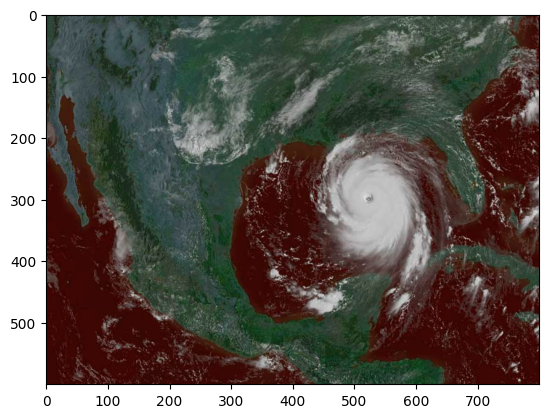

In [24]:
img_map = cv2.imread('img/huracan.jpeg')
plt.imshow(img_map)
plt.show()

In [31]:
## select pixel from image with click and create a dataset with the pixel value and label "C"
import pandas as pd
import tkinter as tk
from tkinter import messagebox

df = pd.DataFrame(columns=['R','G','B', 'label'])

def click_nubes(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        # agregar el pixel al dataframe
        df.loc[len(df)] = [img_map[y,x][0],img_map[y,x][1],img_map[y,x][2], 'C']
        
def click_contiente(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        # agregar el pixel al dataframe
        df.loc[len(df)] = [img_map[y,x][0],img_map[y,x][1],img_map[y,x][2], 'T']
        
def click_agua(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        # agregar el pixel al dataframe
        df.loc[len(df)] = [img_map[y,x][0],img_map[y,x][1],img_map[y,x][2], 'A']
        
def mostrar_alerta(clase):
    # Crear una ventana de Tkinter para el mensaje
    root = tk.Tk()
    root.withdraw()  # Ocultar la ventana principal de Tkinter
    messagebox.showinfo(f"Seleccionar pixeles de {clase}", f"Haga click en los pixeles de la imagen que corresponden a la clase {clase}. Presione la tecla esc para finalizar.")
    root.destroy()  # Cerrar la ventana de Tkinter
        
       
cv2.namedWindow('image')
cv2.setMouseCallback('image', click_nubes)

# elegir los pixeles de la imagen que corresponden a la clase nubes hasta que se presione la tecla esc
mostrar_alerta("NUBES")
while(1):
    # titulo dentro de la imagen "SELECCIONAR PIXELES DE NUBES"
    cv2.imshow('image', img_map)
    # if tecla presionada es esc
    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()

mostrar_alerta("CONTINENTE")
cv2.namedWindow('image')
cv2.setMouseCallback('image', click_contiente)


while(1):
    cv2.imshow('image', img_map)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()
    
mostrar_alerta("AGUA")    
cv2.namedWindow('image')
cv2.setMouseCallback('image', click_agua)

while(1):
    cv2.imshow('image', img_map)
    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows() 


In [33]:
# crear una svm para clasificar los pixeles de la imagen y hacer la matriz de confusion
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X = df[['R','G','B']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = SVC(kernel='linear')
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[4 0 0]
 [0 7 0]
 [0 0 4]]
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         4
           C       1.00      1.00      1.00         7
           T       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



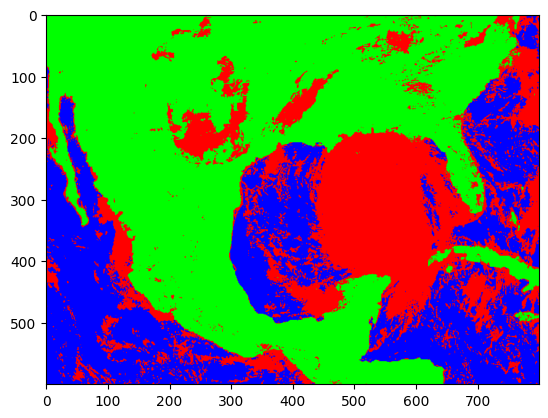

In [34]:
# aplicar la clasificacion a la imagen
import warnings
warnings.filterwarnings('ignore')

img_map_class = img_map.copy()


for i in range(img_map_class.shape[0]):
    for j in range(img_map_class.shape[1]):
        pixel = img_map[i,j]
        pixel = pixel.reshape(1,-1)
        clase = modelo.predict(pixel)
        if clase == 'C':
            img_map_class[i,j] = [255,0,0]
        elif clase == 'T':
            img_map_class[i,j] = [0,255,0]
        else:
            img_map_class[i,j] = [0,0,255]
            
plt.imshow(img_map_class)
plt.show()

c:\Users\hgker\Desktop\master_ds\imagenes_satelitales\scripts\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'list'